# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.



In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

1. Clean the data and perform some EDA and visualization to get to know the data set.

In [3]:
# load the car data as df
df = pd.read_csv("./hw data/cars_hw.csv")
# drop unnamed column
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [4]:
# check for na values
for col in df.columns:
    print(col, ":" , df[col].value_counts(dropna=False))

# no missing values 

Make : Make
Hyundai          305
Maruti Suzuki    293
Honda             73
Renault           68
Ford              52
Toyota            50
MG Motors         35
Volkswagen        29
Tata              23
Mahindra          18
Kia                8
Chevrolet          6
Skoda              5
Nissan             4
Jeep               4
Datsun             3
Name: count, dtype: int64
Make_Year : Make_Year
2017    137
2020    135
2019    124
2018    112
2016     92
2015     85
2014     73
2021     69
2013     53
2011     44
2012     38
2022     14
Name: count, dtype: int64
Color : Color
white     200
red       187
grey      164
silver    132
blue      128
brown      70
black      35
orange     19
bronze     12
beige       9
yellow      6
purple      6
golden      3
maroon      3
green       2
Name: count, dtype: int64
Body_Type : Body_Type
hatchback    484
sedan        227
suv          206
muv           38
crossover     21
Name: count, dtype: int64
Mileage_Run : Mileage_Run
31262    4
31171    4
266

In [5]:
# check price and mileage for na's
df['Price'].unique()
df['Mileage_Run'].unique()

# no missing values 

array([44611, 20305, 29540, 35680, 25126, 52261, 28108, 92603, 16304,
       26350, 35400, 71450, 32395, 15059, 31994, 13768,  3174, 70137,
       35913, 19056, 32492, 22598, 85981, 17791, 26910, 28562, 40345,
       19550, 54233, 33113, 79565, 10651, 27664, 13389, 30797, 48947,
       37315, 11047, 24858,  4839, 16329, 57286,  3679, 96077, 30406,
       60873, 24811, 56275, 78981,  7434, 10730, 21996,  3474, 64458,
       24360, 69939, 35387, 63035, 26190, 47013, 11734, 27902, 66674,
       38143, 13554,  1540, 12285, 80408, 83377, 21887, 40498, 18065,
       70958, 16090, 55617, 87773, 54744, 18915, 97573,  4776, 24676,
       52291, 49775, 83551, 34075, 14414, 35796, 38199,  8197, 27626,
       48106, 12031,  5992, 20427,  8560, 58693, 18282, 17214, 77692,
       10381, 28831, 72359, 36922, 72356, 55760, 77836, 68269, 62659,
       59847, 83607, 33439, 81799, 30378,  5129,  8873, 78297, 50808,
       16384, 16123, 47487, 25632, 33269, 73950, 70520, 50735,  6491,
       42905, 42222,

In [6]:
# statistical descriptions for numeric variables 
print("Price: " , df['Price'].describe().round(2))
print("\nMileage Run: " , df['Mileage_Run'].describe().round(2))
print("\nMake Year: " , df['Make_Year'].describe().round(2))

Price:  count        976.00
mean      741019.47
std       367323.38
min       188000.00
25%       475750.00
50%       666500.00
75%       883000.00
max      2941000.00
Name: Price, dtype: float64

Mileage Run:  count      976.00
mean     41571.20
std      24391.00
min       1117.00
25%      22676.75
50%      37570.50
75%      57421.25
max      99495.00
Name: Mileage_Run, dtype: float64

Make Year:  count     976.00
mean     2016.96
std         2.82
min      2011.00
25%      2015.00
50%      2017.00
75%      2019.00
max      2022.00
Name: Make_Year, dtype: float64


No_of_Owners
1    818
2    154
3      4
Name: count, dtype: int64


C:\Users\ilian\AppData\Local\Temp\ipykernel_4036\1396159688.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['No_of_Owners'] = df['No_of_Owners'].replace("3rd", 3)


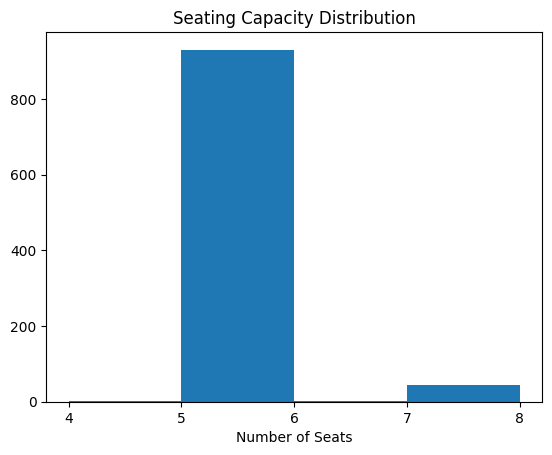

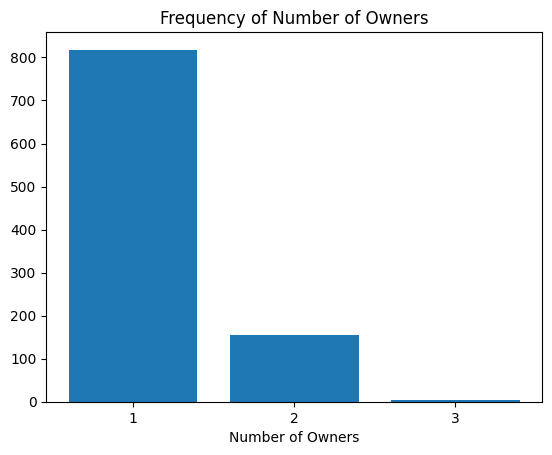

In [7]:
# distribution of numeric but discrete variables - Seats and Number of Owners

# replace 1st, 2nd, 3rd with integers 
df['No_of_Owners'].value_counts(dropna=False)
df['No_of_Owners'] = df['No_of_Owners'].replace("1st", 1)
df['No_of_Owners'] = df['No_of_Owners'].replace("2nd", 2)
df['No_of_Owners'] = df['No_of_Owners'].replace("3rd", 3)
print(df['No_of_Owners'].value_counts(dropna=False))

# histogram of seats 
plt.hist(x=df['Seating_Capacity'], bins=4)
plt.title("Seating Capacity Distribution")
plt.xticks(ticks=[4, 5, 6, 7, 8], labels=[4, 5, 6, 7, 8])
plt.xlabel("Number of Seats")
plt.show()

# bar chart of number of owners
c = df['No_of_Owners'].value_counts().sort_index()
plt.bar(x=c.index, height=c.values)
plt.xlabel('Number of Owners')
plt.xticks(ticks=[1, 2, 3], labels=[1, 2, 3])
plt.title("Frequency of Number of Owners")
plt.show()

[]

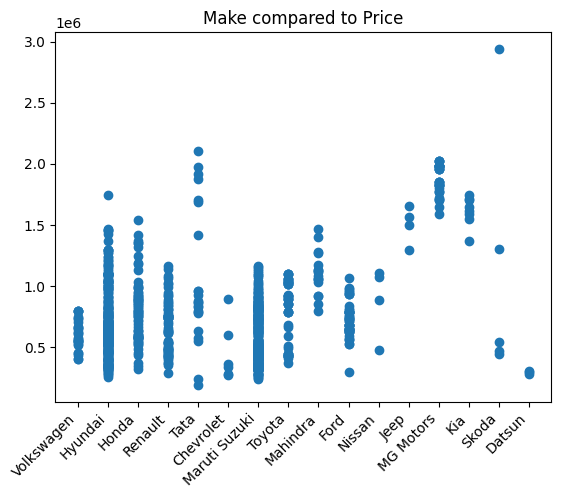

In [8]:
# scatterplot of make vs price
plt.scatter(x=df['Make'], y=df['Price'])
plt.xticks(rotation=45, ha="right")
plt.title("Make compared to Price")
plt.plot()

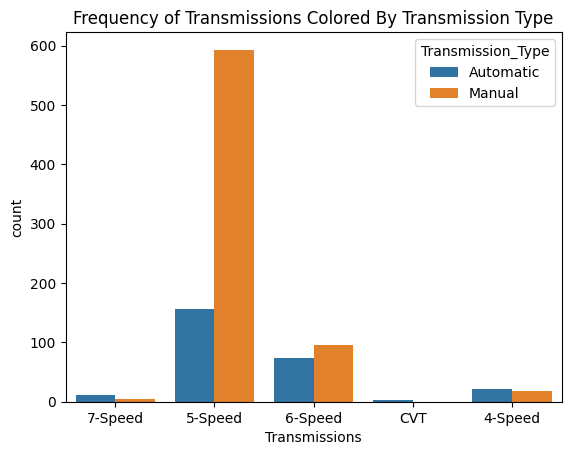

In [9]:
# bar chart of number of owners
c = df['Transmission'].value_counts().sort_index()
sns.countplot(data=df, x='Transmission', hue='Transmission_Type')
plt.xlabel('Transmissions')
plt.title("Frequency of Transmissions Colored By Transmission Type")
plt.show()

2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.

In [10]:
# using one hot encoding to turn categorical variables into 0 or 1 
cols = ['Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission', 'Transmission_Type']
df = pd.get_dummies(df, columns=cols, drop_first=False).astype(int)
df.head()

,Make_Year,Mileage_Run,No_of_Owners,Seating_Capacity,Price,Make_Chevrolet,Make_Datsun,Make_Ford,Make_Honda,Make_Hyundai,...,Fuel_Type_diesel,Fuel_Type_petrol,Fuel_Type_petrol+cng,Transmission_4-Speed,Transmission_5-Speed,Transmission_6-Speed,Transmission_7-Speed,Transmission_CVT,Transmission_Type_Automatic,Transmission_Type_Manual
0,2017,44611,1,5,657000,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
1,2016,20305,1,5,682000,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
2,2019,29540,2,5,793000,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
3,2017,35680,1,5,414000,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,2017,25126,1,5,515000,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1


3. Implement an ~80/~20 train-test split. Put the test data aside.


In [11]:
# use Price as target variable
X = df.drop(columns=['Price']) 
y = df['Price']

# splitting sample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?

The RMSE for the training set is 142154 and the $R^2$ for the training set is 0.855. The RMSE for the test set is 143815 and the $R^2$ for the test set is 0.819. The training model does better because it has a higher $R^2$ value and a lower RMSE value, which is what we want.

In [12]:
# build and fit linear model 
m = LinearRegression().fit(X_train, y_train)

# making predictions 
y_test_pred = m.predict(X_test)
y_train_pred = m.predict(X_train)

# computing r^2 on test set 
r2_test = r2_score(y_test, y_test_pred)
# computing r^2 on training set
r2_train = r2_score(y_train, y_train_pred)

# computing rmse on test set 
# rmse = sqrt(mse)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
# computing rmse on training set 
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# print everything
print("Training R^2: " , r2_train)
print("Test R^2: " , r2_test)
print("Training RMSE: " , rmse_train)
print("Testing RMSE: " , rmse_test)

Training R^2:  0.8552247578997088
Test R^2:  0.819671700720024
Training RMSE:  142154.1934347692
Testing RMSE:  143815.3027661447


5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities? 

There seem to be non-linearities for the discrete numeric variables, like Make Year, Number of Owners, and Seating Capacity. The linear model just doesn't seem to work well because the data is in big chunks around the whole numbers. 

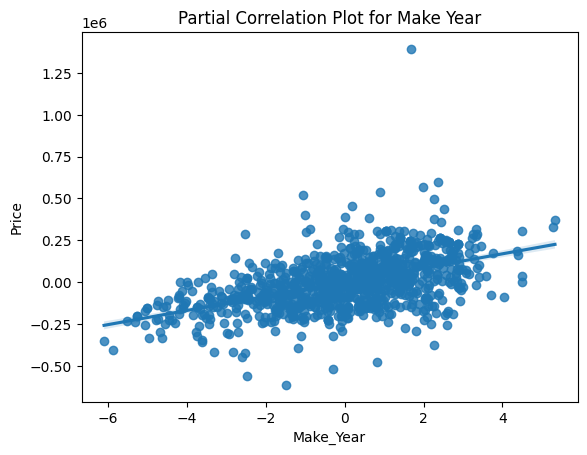

In [13]:
# numeric variables: Make_Year, Mileage_Run, No_of_Owners, Seating_Capacity
# running regression
reg = LinearRegression(fit_intercept=True).fit(X, y)

# start with Make Year
x_k = X['Make_Year']
X_mk = X.drop('Make_Year', axis=1)

# regress y on x/k and save residual r_y
reg_y = LinearRegression(fit_intercept=False).fit(X_mk, y)
r_y = y - reg_y.predict(X_mk)

# regress x_k on x/k and save residual r_x
reg_k = LinearRegression(fit_intercept=False).fit(X_mk, x_k)
r_x = x_k - reg_k.predict(X_mk)

# plot r_y against r_x in partial correlation plot 
sns.regplot(x=r_x, y=r_y)
plt.title("Partial Correlation Plot for Make Year")
plt.show()

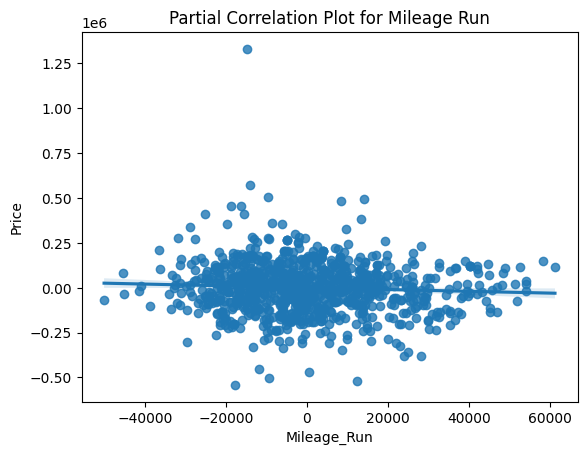

In [14]:
# Mileage_Run
x_k = X['Mileage_Run']
X_mk = X.drop('Mileage_Run', axis=1)

# regress y on x/k and save residual r_y
reg_y = LinearRegression(fit_intercept=False).fit(X_mk, y)
r_y = y - reg_y.predict(X_mk)

# regress x_k on x/k and save residual r_x
reg_k = LinearRegression(fit_intercept=False).fit(X_mk, x_k)
r_x = x_k - reg_k.predict(X_mk)

# plot r_y against r_x in partial correlation plot 
sns.regplot(x=r_x, y=r_y)
plt.title("Partial Correlation Plot for Mileage Run")
plt.show()

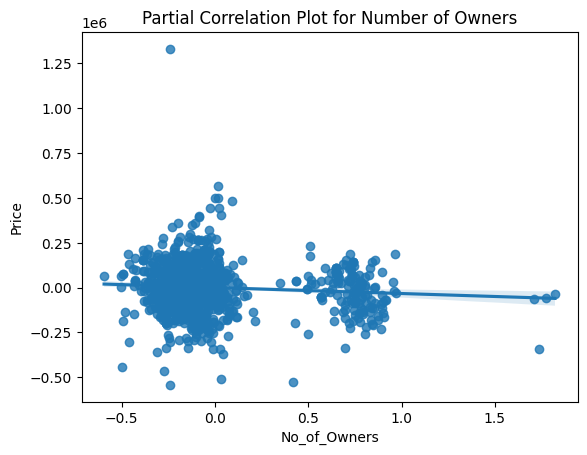

In [15]:
# No_of_Owners
x_k = X['No_of_Owners']
X_mk = X.drop('No_of_Owners', axis=1)

# regress y on x/k and save residual r_y
reg_y = LinearRegression(fit_intercept=False).fit(X_mk, y)
r_y = y - reg_y.predict(X_mk)

# regress x_k on x/k and save residual r_x
reg_k = LinearRegression(fit_intercept=False).fit(X_mk, x_k)
r_x = x_k - reg_k.predict(X_mk)

# plot r_y against r_x in partial correlation plot 
sns.regplot(x=r_x, y=r_y)
plt.title("Partial Correlation Plot for Number of Owners")
plt.show()

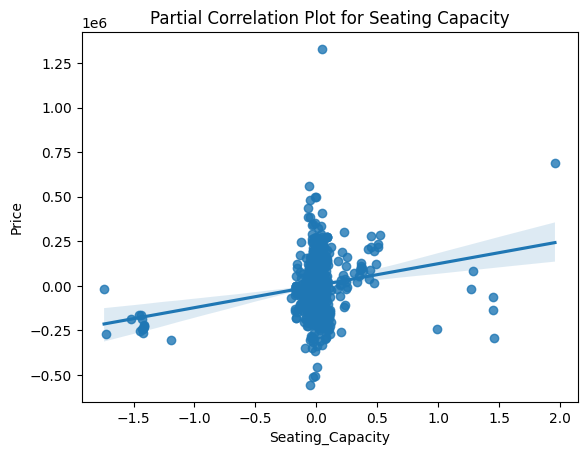

In [16]:
# Seating_Capacity
x_k = X['Seating_Capacity']
X_mk = X.drop('Seating_Capacity', axis=1)

# regress y on x/k and save residual r_y
reg_y = LinearRegression(fit_intercept=False).fit(X_mk, y)
r_y = y - reg_y.predict(X_mk)

# regress x_k on x/k and save residual r_x
reg_k = LinearRegression(fit_intercept=False).fit(X_mk, x_k)
r_x = x_k - reg_k.predict(X_mk)

# plot r_y against r_x in partial correlation plot 
sns.regplot(x=r_x, y=r_y)
plt.title("Partial Correlation Plot for Seating Capacity")
plt.show()

6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?

The RMSE on the training set is 88.45 and the $R^2$ on the training set is 0.999. The RMSE on the test set is 183.32 and the $R^2$ on the test set is 0.999. This more complex model has much higher $R^2$ values, which means that the variables are more strongly correlated. Both the training and test sets have lower RMSE values, which is better as well. 

In [17]:
# from before, X = df minus Price and y = df['Price']

# adding 3 polynomial features 
expander = PolynomialFeatures(degree=3, include_bias=False)
# pass df into expander to get interactions 
Z = expander.fit_transform(df)
# get column names
names = expander.get_feature_names_out()
# create new expanded df
X_exp = pd.DataFrame(data=Z, columns=names)

Xdf = pd.concat( [X_exp, X], axis=1)
Xdf

,Make_Year,Mileage_Run,No_of_Owners,Seating_Capacity,Price,Make_Chevrolet,Make_Datsun,Make_Ford,Make_Honda,Make_Hyundai,...,Fuel_Type_diesel,Fuel_Type_petrol,Fuel_Type_petrol+cng,Transmission_4-Speed,Transmission_5-Speed,Transmission_6-Speed,Transmission_7-Speed,Transmission_CVT,Transmission_Type_Automatic,Transmission_Type_Manual
0,2017.0,44611.0,1.0,5.0,657000.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,1,0
1,2016.0,20305.0,1.0,5.0,682000.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,1,0,0,0,0,1
2,2019.0,29540.0,2.0,5.0,793000.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,1,0,0,0,0,1
3,2017.0,35680.0,1.0,5.0,414000.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,1,0,0,0,0,1
4,2017.0,25126.0,1.0,5.0,515000.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,2018.0,23869.0,1.0,5.0,956000.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,1,0,0,1,0
972,2019.0,14831.0,1.0,5.0,1027000.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,1,0,0,1,0
973,2014.0,52846.0,1.0,5.0,736000.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,1,0,0,0,0,1,0
974,2020.0,28335.0,2.0,5.0,749000.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,0,1,0,0,0,1,0


In [18]:
# build more complex model 
# use Price as target variable
X = Xdf.drop(columns=['Price']) 
y = Xdf['Price']

# splitting sample
Xdf_train, Xdf_test, ydf_train, ydf_test = train_test_split(X, y, test_size=0.2, random_state=42)


# build and fit linear model 
m = LinearRegression().fit(Xdf_train, ydf_train)

# making predictions 
ydf_test_pred = m.predict(Xdf_test)
ydf_train_pred = m.predict(Xdf_train)

# computing r^2 on test set 
dfr2_test = r2_score(ydf_test, ydf_test_pred)
# computing r^2 on training set
dfr2_train = r2_score(ydf_train, ydf_train_pred)

# computing rmse on test set 
# rmse = sqrt(mse)
dfrmse_test = np.sqrt(mean_squared_error(ydf_test, ydf_test_pred))
# computing rmse on training set 
dfrmse_train = np.sqrt(mean_squared_error(ydf_train, ydf_train_pred))

# print everything
print("Training R^2: " , dfr2_train)
print("Test R^2: " , dfr2_test)
print("Training RMSE: " , dfrmse_train)
print("Testing RMSE: " , dfrmse_test)

Training R^2:  0.9999997289527105
Test R^2:  0.9999849699225424
Training RMSE:  194.50692138217673
Testing RMSE:  1312.9668645080633


7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?


Based on the results from 1 to 6, having a more complex model creates more accurate results. In question 4, we can see that high RMSE values can indicate an underfitting model. Underfitting models are usually too simple, and we see this in the next question. The second, more complex model isn't really an overfitting model based on the RMSE value, even though the test rmse is higher than the training rmse I don't think it indicates an overfitting model because compared to the previous model the difference isn't that big.